  ### Feature scalling 

Feature scaling is a technique used in data preprocessing to standardize or normalize the range of independent variables or features of data. Here's a simple way to understand it:

Imagine a Classroom with Tall and Short Students
Suppose you want to compare students' heights (in meters) and weights (in kilograms).
Heights might range from 1.5 to 2 meters, while weights could range from 50 to 100 kilograms.
If you don't scale these features, the model might give more importance to weight because its values are numerically larger.
Why Does This Matter?
Many machine learning algorithms (e.g., gradient descent-based models like logistic regression or distance-based models like k-NN) perform better when features are on a similar scale.
If not scaled, large values dominate small values, skewing the model's performance.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('wine_data.csv', header=None,usecols=[0,1,2])
df.columns=["Class level", "Alcohol", "Malice Acid"]

In [5]:
df

,Class level,Alcohol,Malice Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

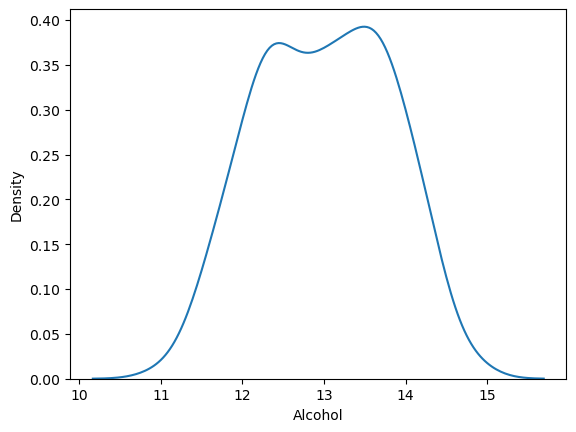

In [6]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malice Acid', ylabel='Density'>

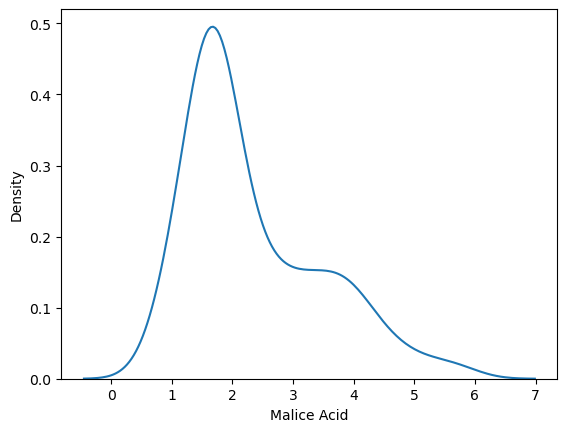

In [8]:
sns.kdeplot(df["Malice Acid"])

<Axes: xlabel='Alcohol', ylabel='Malice Acid'>

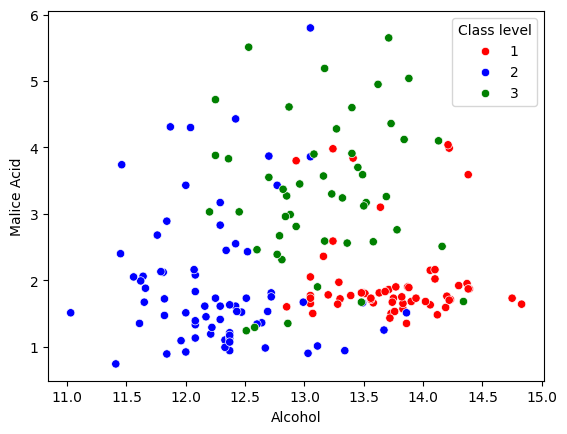

In [17]:
color_dict = {1:"red", 2:"blue", 3:"green"}
sns.scatterplot(x = df['Alcohol'],y = df['Malice Acid'],hue=df['Class level'],palette=color_dict)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class level', axis = 1),
                                                    df['Class level'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape


((124, 2), (54, 2))

### Min-Max Scaler

The `MinMaxScaler` is a scaling technique that transforms the data such that all feature values are scaled to a specific range, usually [0, 1].

The formula for scaling using Min-Max Scaler is:

\[
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\]

Where:

- \(X_{\text{min}}\) and \(X_{\text{max}}\) are the minimum and maximum values of a feature in the training data.
- \(X\) is the original value of the feature.
- \(X_{\text{scaled}}\) is the scaled value.

### Key Points:
- The scaler learns the minimum and maximum values from the training data during the `fit` step.
- These learned parameters are then applied consistently to both the training and testing datasets during the `transform` step.
- Scaling is important for machine learning models that rely on distance or gradient-based optimization to ensure that features contribute equally to the model.


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
np.round(X_train.describe(), 1)

,Alcohol,Malice Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [25]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malice Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


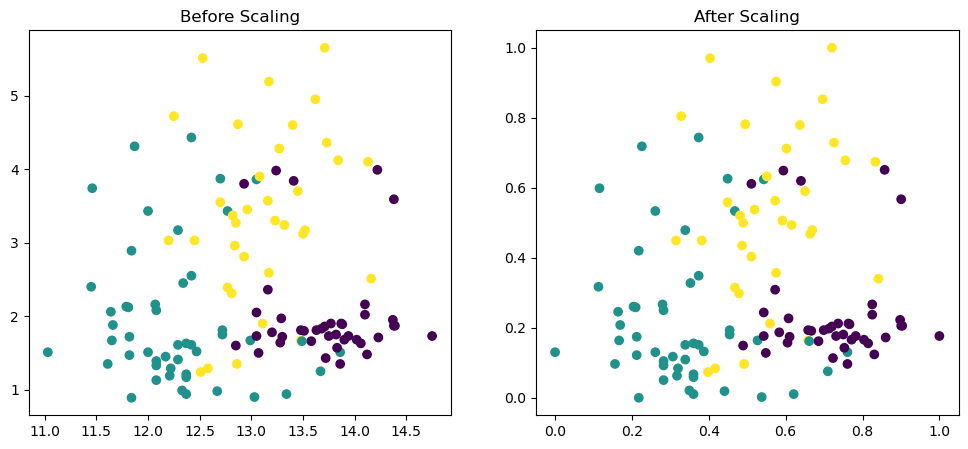

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malice Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malice Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

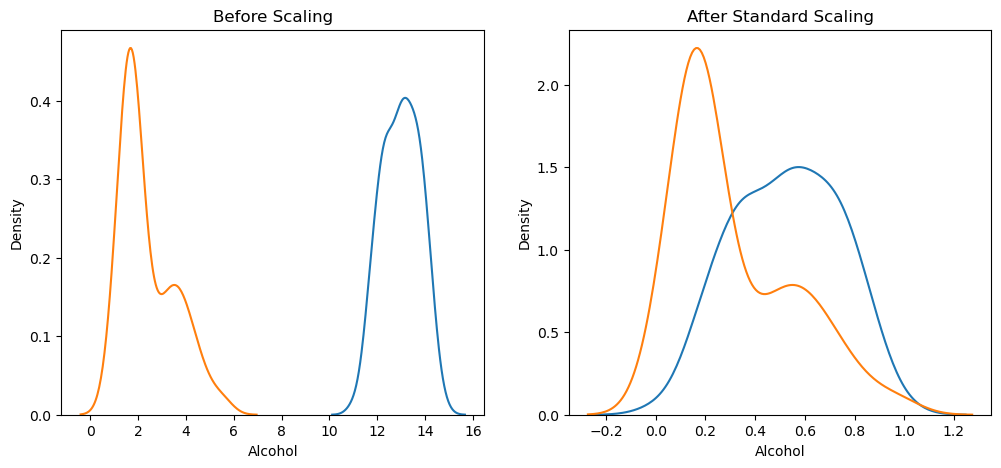

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malice Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malice Acid'], ax=ax2)
plt.show()

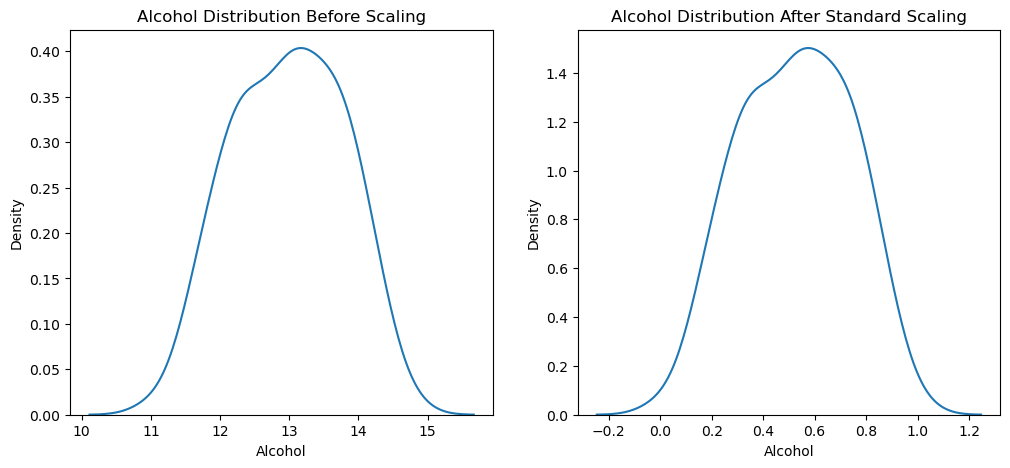

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

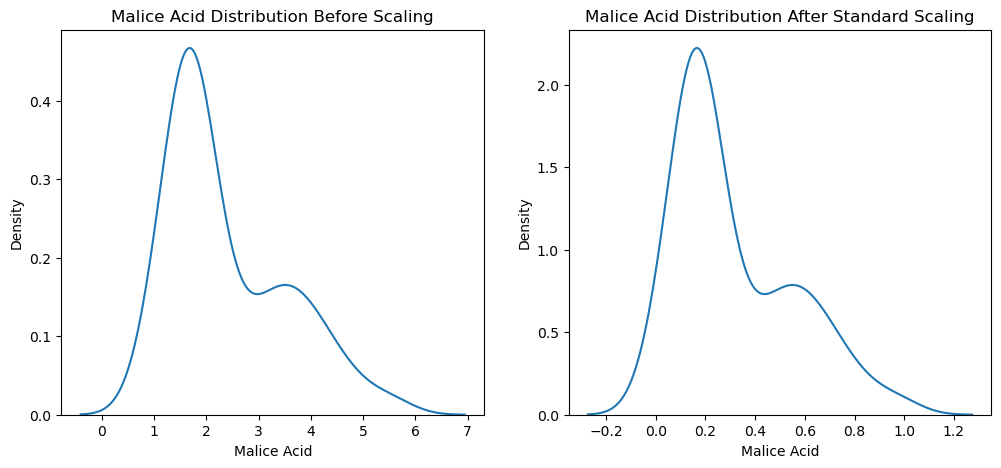

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malice Acid Distribution Before Scaling')
sns.kdeplot(X_train['Malice Acid'], ax=ax1)

# after scaling
ax2.set_title('Malice Acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malice Acid'], ax=ax2)
plt.show()

### Mean Normalization

Mean normalization is a feature scaling technique that adjusts the range of the data by centering the features around zero. 
This is done by subtracting the mean of each feature and dividing by the range or standard deviation. The goal is to standardize the
data, ensuring that features with different scales or units contribute equally to the learning process.
Rearly used in sklearn and there is no class in sklearn. You have to write a code by own.


Max Absolute Scaling is a feature scaling technique that transforms the data by dividing each feature by its maximum absolute value. 
This ensures that all features lie within the range [-1,1] while maintaining the sparseness of the data 
(i.e., the presence of many zeros in datasets like text or recommendation systems). 
Not used that much. Basically used in sparse data set with many zeros. Sklearn has class called MaxAbsScaler. 

